# Dimensionality Reduction

## 1. Feature Extraction:   


1. transform or porject the data onto a new feature space.  
2. improve computational efficiency   
3. reduce the curse of dimensionality

## 2. PCA

1. identify patterns in data based on correlation between fatures.
2. find the direction of max variance in high-dimensional data and project to lower dimensional
3. sensetive to scaling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df_wine = pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')

In [ ]:
df_wine.columns = ['Class label','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids',
                   'Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']

In [12]:
# Data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
X , y = df_wine.iloc[:,1:], df_wine.iloc[:,0]
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0,test_size = 0.3)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [18]:
# eigenvalues
import numpy as np
cov_mat = np.cov(X_test_std.T)
eigen_vals,eigen_vecs = np.linalg.eig(cov_mat)
print(eigen_vals)

[4.5587553  2.65338926 1.33002158 1.12549719 0.7955333  0.55208871
 0.43040117 0.25178108 0.21781015 0.17581265 0.15631419 0.11659798
 0.1073023 ]


In [41]:
# plot decision regions
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X,y,Classifier,resolution = 0.02):
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
        
    # plot decision surface
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x_min, x_max, resolution),
                             np.arange(y_min, y_max, resolution))
    Z = Classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha = 0.4,cmap = cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    #plot all sample
    # X_test,y_test = X[test_idx,:],y[test_idx]
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl,0],y = X[y == cl,1],
                   alpha = 0.8,c = cmap(idx),
                   marker = markers[idx],label = cl)

Text(0.5,1,'PCA')

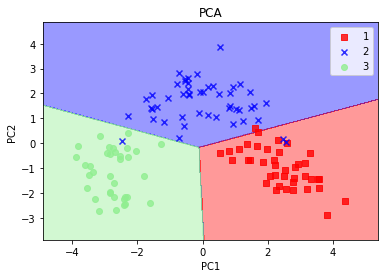

In [50]:
# Use PCA component to 2 features
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) # component to 2 features
lr = LogisticRegression()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca,y_train)
plot_decision_regions(X = X_train_pca,y = y_train,Classifier=lr)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.title("PCA")

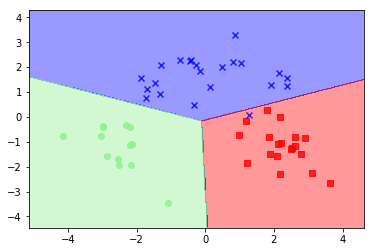

In [45]:
plot_decision_regions(X = X_test_pca,y = y_test,Classifier=lr)

In [46]:
pca.explained_variance_ratio_

array([0.37329648, 0.18818926])

In [48]:
# explained_variance_ratio_ will plot the variance
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.37329648, 0.18818926, 0.10896791, 0.07724389, 0.06478595,
       0.04592014, 0.03986936, 0.02521914, 0.02258181, 0.01830924,
       0.01635336, 0.01284271, 0.00642076])

## 3. LDA

Linear Discriminant Analysis:  Find feature subspace that optimize class separability  
1. increase the computational efficiency 
2. reduce the degree of over-fitting  

PCA : unsuperived  
LDA : superived


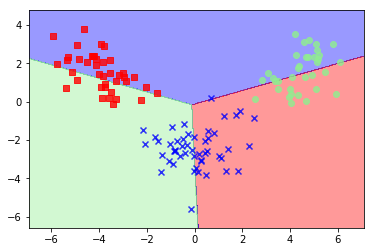

In [64]:
#from sklearn.lda import LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components = 2)
X_train_lda = lda.fit_transform(X_train_std,y_train)
plot_decision_regions(X_train_lda,y_train,Classifier=lr)

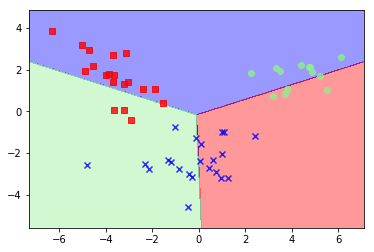

In [62]:
X_test_lda = lda.transform(X_test_std)
plot_decision_regions(X_test_lda,y_test,Classifier=lr)

## 4. Kernel principal component analysis

### Example 1: separating half-moon shapes

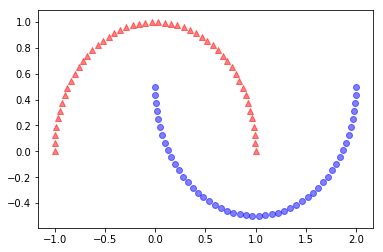

In [66]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples = 100, random_state = 123)
plt.scatter(X[y==0,0],X[y==0,1],color = 'red',marker='^',alpha=0.5)
plt.scatter(X[y==1,0],X[y==1,1],color = 'blue',marker='o',alpha=0.5)

In [68]:
X.shape

(100, 2)

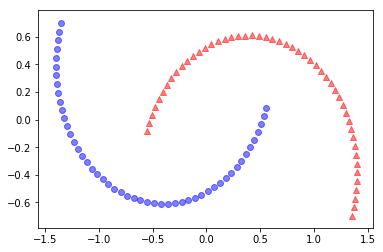

In [71]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[y==0,0],X_pca[y==0,1],color = 'red',marker='^',alpha=0.5)
plt.scatter(X_pca[y==1,0],X_pca[y==1,1],color = 'blue',marker='o',alpha=0.5)

In [83]:
# rbf_kernel_pca 未完成中